# Лабораторная работа № 1
## Мусаев Артур
## А-13а-20
### Вариант № 16

Импортируем библиотеки:

In [1]:

import numpy as np
import matplotlib.pyplot as plt

### Задание 1.1

Найти значения  машинного нуля, машинной бесконечности и машинного эпсилон.

Машинный нуль

In [2]:

m = 1
while 2 ** (-m) != 0:
    m += 1
Mnull = 2**(-m+1)
print(f'Машинный нуль: {Mnull:.2e}')

Машинный нуль: 4.94e-324


Первое натуральное число , при котором $ 2^{-m} $ совпадает с нулем:

In [3]:
print (m)

1076


Машинная бесконечность

In [4]:
Minf = 1.0
Buf = 2.0
n = 2
while Buf * 2.0 != Buf:
    Buf *= 2.0
    Minf *= 2.0
    n += 1
print(f'Машинная бесконечность: {Minf:.2e}')

Машинная бесконечность: 8.99e+307


Первое натуральное число , при котором происходит переполнение:

In [5]:
print(n+1)

1026


Машинный эпсилон

In [6]:
k = 1
while 1 + 2**(-k) != 1 :
    k += 1
Meps = 2**(-k+1)
print(f'Машинный эпсилон: {Meps:.2e}')

Машинный эпсилон: 2.22e-16


Наибольшее натуральное число, при котором сумма вычисленного значения $ 1+2^{-k} $  еще больше 1

In [7]:
print(k-1)

52


### Задание 1.2 
Исследовать поведение погрешности приближения функции $ F(x) $ частичными суммами  на отрезке $ [a,b] $.

$$ F(x) = x^{2}cosx $$ на отрезке $$ [-5;-2] $$

In [8]:
#Объявление функций

#Исходная функция
def F(x) :
    return (x*x)*(np.cos(x))

#Разложения в ряд Тейлора
def Taylor(x, k) :
    return ((-1)**(k+1)) * (x**(2*k)) /(np.math.factorial(2*k - 2))

#Нахождение частичных сумм
def S(x, n):
    res = x * 0
    for i in range(1,n) :
         res = res + Taylor(x, i) 
    return res

#Абсолютная погрешность
def AbsD(x, n) :
    return abs(S(x, n) - F(x))

#Относительная погрешность
def RelD(x, n) :
    return AbsD(x, n)/(abs(S(x, n)))



В ряду Тейлора по данной функции каждый нечетный элемент будет равен нулю, поэтому, для наглядности работы
я опустил нечетные(нулевые) элементы ряда. Получился ряд: $$ \frac{x^{2}}{0!} - \frac{x^{4}}{2!} +\frac {x^{6}}{4!} + ... , $$
где $ \frac{x^{2}}{0!} $ - первый элемент ряда,  $ \frac{-x^{4}}{2!} $ - второй элемент ряда и т.д.
И общий член ряда: $$ \sum_{k=1}^{+\infty} (-1)^{(k+1)}\frac{x^{2k}}{(2k-2)!} $$

In [9]:
#Отрезок
a = -5
b = -2
c = (a+b)/2
x_data = np.linspace(a, b, 1000)

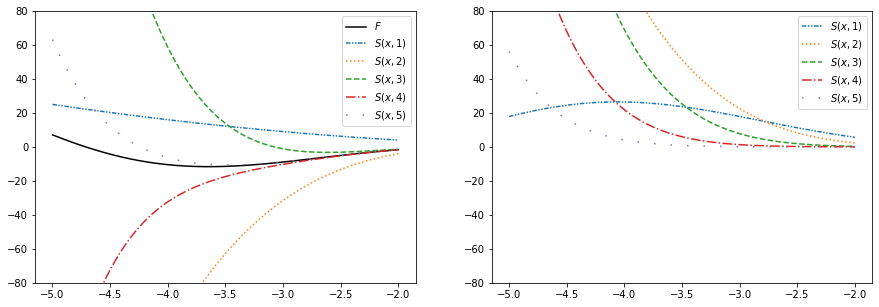

In [10]:
#Строим графики
fig, axs = plt.subplots(1,2, figsize = (15, 5))

#Сперва черной сплошной линией нарисуем на первом графике функцю
axs[0].plot(x_data,F(x_data),label = '$F$',color = "black")

#задаем кортеж из стилей линий
line_styles = ((0, (3, 1, 1, 1, 1, 1)), 'dotted', 'dashed',
 'dashdot', (0, (1, 10)))
#в цикле рисуем S на первом графике
axs[0].set_ylim([-80,80])
for i in range(2,7) :
    axs[0].plot(x_data, S(x_data, i), label=f'$S(x,{i-1})$', 
                ls = line_styles[i-2])
axs[0].legend()

axs[1].set_ylim([-80,80])
for i in range(2,7) :
    axs[1].plot(x_data, AbsD(x_data, i), label=f'$S(x,{i-1})$', 
                ls = line_styles[i-2])
axs[1].legend()


Вычисление количество членов ряда $ N $, 
при котором величина относительной погрешности  в средней  точке отрезка   станет меньше машинного эпсилон.

In [11]:
sum = Taylor(c, 1)
next = Taylor(c, 2)
N_m_error = 2
while abs(next/sum) > Meps:
    sum += next
    N_m_error += 1
    next = Taylor(c, N_m_error)
print(N_m_error)

16


[(0.0, 1e-13)]

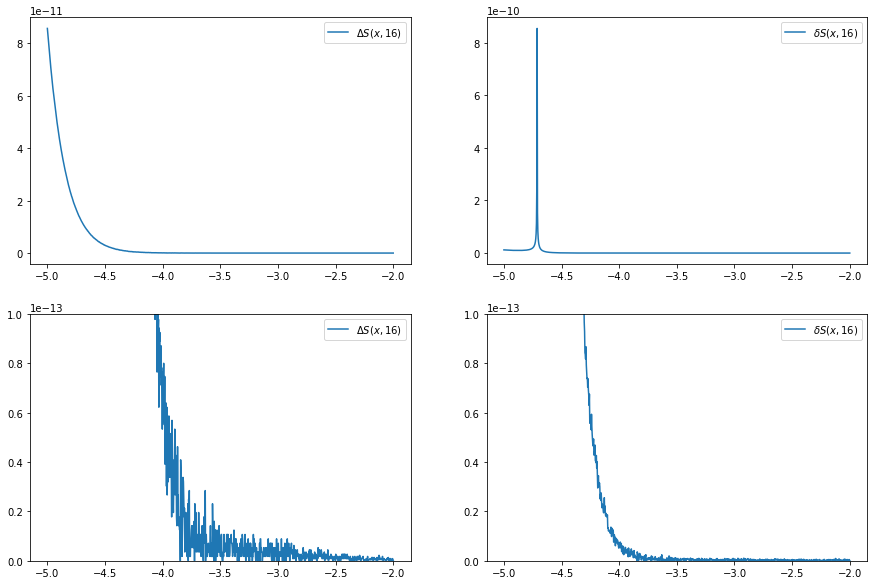

In [12]:
#Делаем рисунок из четырех графиков
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0][0].plot(x_data, AbsD(x_data, N_m_error),label=f'$\Delta S(x,{N_m_error})$')
axs[0][0].legend()

axs[0][1].plot(x_data, RelD(x_data,N_m_error), label=f'$\delta S(x,{N_m_error})$')
axs[0][1].legend()

axs[1][0].plot(x_data, AbsD(x_data, N_m_error),label=f'$\Delta S(x,{N_m_error})$')
axs[1][0].legend()

axs[1][1].plot(x_data, RelD(x_data,N_m_error), label=f'$\delta S(x,{N_m_error})$')
axs[1][1].legend()

#Зададим границы y для нижих графиков
axs[1][0].set(ylim=(0.0, 10E-14))
axs[1][1].set(ylim=(0.0, 10E-14))

In [21]:
#Программа округления вычислений результата до t = 4 разрядов мантиссы
def ROUND(x,t) :
    return float(np.format_float_scientific(x, precision = t-1))
#Округление суммы
def S_rounded(x, n) :
    res = x * 0
    for i in range(1,n) :
         res = res + ROUND(Taylor(x, i), 4) 
    return ROUND(res, 4)

#Делаем массив
def S_rounded_array(x,n) :
    res = x.copy()
    for i in range(len(x)):
        res[i] = S_rounded(x[i], n)
    return res


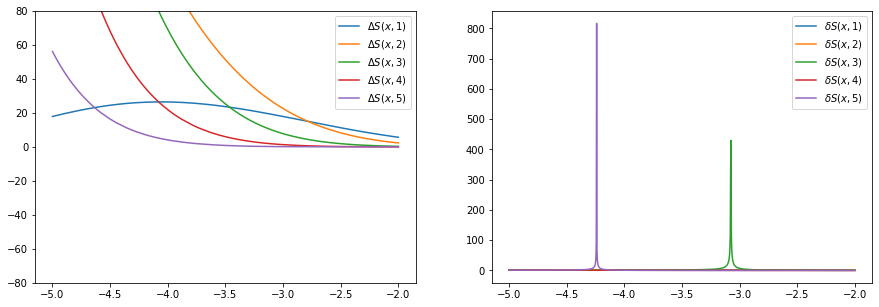

In [22]:
#Строим новые графики порешностей

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].set_ylim([-80,80])
for i in range(2,7) :

    axs[0].plot(x_data, abs(F(x_data) - S_rounded_array(x_data, i))
            ,label=f'$\Delta S(x,{i-1})$')
axs[0].legend()

for i in range(2,7) :

    axs[1].plot(x_data, abs((F(x_data) - S_rounded_array(x_data, i))
                /S_rounded_array(x_data, i)), label=f'$\delta S(x,{i-1})$')
axs[1].legend()

Сравнение графиков абсолютной погрешности с округлением и без

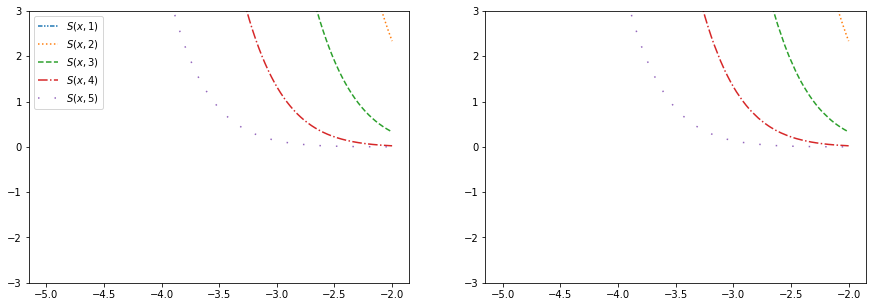

In [24]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
line_styles = ((0, (3, 1, 1, 1, 1, 1)), 'dotted', 'dashed',
 'dashdot', (0, (1, 10)))

axs[0].set_ylim([-3,3])
for i in range(2,7) :
    axs[0].plot(x_data, AbsD(x_data, i), label=f'$S(x,{i-1})$', 
                ls = line_styles[i-2])
axs[0].legend()

axs[1].set_ylim([-3,3])
for i in range(2,7) :
    axs[1].plot(x_data, abs(F(x_data) - S_rounded_array(x_data, i))
            ,label=f'$\Delta S(x,{i-1})$', ls = line_styles[i-2])
axs[0].legend()




Графики погрешностей для $N-$х сумм, с учетым округления.

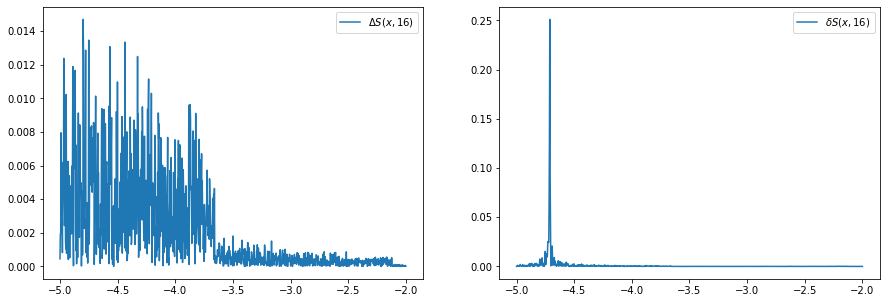

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(x_data, abs(F(x_data) - S_rounded_array(x_data, N_m_error))
            ,label=f'$\Delta S(x,{N_m_error})$')
axs[0].legend()

axs[1].plot(x_data, abs((F(x_data) - S_rounded_array(x_data, N_m_error))
            /S_rounded_array(x_data, N_m_error)), label=f'$\delta S(x,{N_m_error})$')
axs[1].legend()

Вывод: из графиков видно, что погрешность при округлении до 4 разряда мантиссы увеличивается.
Связано это с тем, что при округлении увеличивается абсолютная погрешность. Из графика абсолютной погрешности видно,
что с ростом количества элементов частичной суммы, увеличивается и погрешность.

### Задание 1.3

$$ f(a,b,c) = \frac{2a}{a^2+2bc} $$
$ a=1.25, b=2.83, c=0.0187 $

Оценить погрешность результата двумя способами:
а) используя оценки погрешности для арифметических операций
б) используя общую формулу погрешностей

Пункт а)

Приведём формулы: $$ \delta{a^*}<<1 \ и \ \delta{b^*}<<1 \ то \ \delta{(a^*b^*)} \leq \delta{a^*} + \delta{b^*} $$
$$ \delta{a^*}<<1 \ и \ \delta{b^*}<<1 \ то \ \delta{(a^*/b^*)} \leq \delta{a^*} + \delta{b^*} $$
$$ \Delta{(a^*+b^*)} \leq \Delta{a^*} + \Delta{b^*} $$
$$ \delta({a^*}) = \frac{|\Delta{a^*}|}{|a|} $$


$ \Delta a = 0.005 \ \ \ \ \ \ \delta a = \frac{\Delta{a}}{a} = \frac{0.005}{1.25} = 0.004  \\ $
$ \Delta b = 0.005 \ \ \ \ \ \ \delta b = \frac{\Delta{b}}{b} = \frac{0.005}{2.83} = 0.00176678  \\ $
$ \Delta c = 0.00005 \ \ \ \ \ \ \delta c = \frac{\Delta{c}}{c} = \frac{0.00005}{0.0187} = 0.00267380 $

$ f = \frac{2*1.25}{1.25^2+2*2.83*0.0187} = 1.49849371 $

$ \delta{(a^2)} \ \leq \ 2\delta{a} = 2 * 0.004 = 0.008 \\ $
$ \Delta{(a^2)} = \delta{a^2}*a^2 = 0.008 * 1.5625 = 0.0125 \\ $
$ \delta{(bc)} \ \leq \ \delta{b}+\delta{c} = 0.00176678 + 0.00267380 = 0.00444058 \\ $
$ \Delta{(bc)} = 2*\delta{(bc)}*b*c = 2*0.00444058*2.83*0.0187 = 0.000469999868 \\ $
$ \Delta{(a^2+2bc)} \ \leq \ \Delta{(a^2)} + \Delta{(2bc)} = 0.0129699999 \\ $
$ \delta{(a^2+2bc)} = \frac{\Delta{(a^2+2bc)}}{a^2+2bc} = 0.00777418533 \\ $
$ \delta{(2a)} = \delta{a} = 0.004 \\ $
$ \delta{f} \ \leq \ \Delta{(2a)} + \Delta{(a^2+2bc)} 0.004+0.00777418533 = 0.0117741853 \ \approx \ 0.012 \\ $
$ \Delta{f} = f * \delta{f} = 0.0176435426 \ \approx \ 0.018 \\ $
$ f = 1.498 \pm 0.018 \ $ три верные цифры


Пункт б)

$ \frac{\partial {f}}{\partial{a}} = \frac{2(2bc-a^2)}{(a^2+2bc)^2} = \frac{2(2*2.83*0.0187-1.25^2)}{(1.25^2+2*2.83*0.0187)^2} = -1.04668844 \\ $
$ \frac{\partial {f}}{\partial{b}} = \frac{-4ac}{(2cb + a^2)^2} = \frac{-4*1.25*0.0187}{(2*0.0187*2.83 + 1.25^2)^2} = -0.0335924318 \\ $
$ \frac{\partial {f}}{\partial{c}} = \frac{-4ab}{(2cb + a^2)^2} = \frac{-4*1.25*2.83}{(2*0.0187*2.83 + 1.25^2)^2} = -5.08377444 \\ $
$ \Delta{f} = |\frac{\partial {f}}{\partial{a}}|\Delta{a} + |\frac{\partial {f}}{\partial{b}}|\Delta{b} + |\frac{\partial {f}}{\partial{c}}|\Delta{c} = 0.0052334422+0.000167962159+0.000254188722 = 0.00565550308 \ \approx \ 0.0057 \\ $
$ \delta{f} = \frac{\Delta{f}}{f} \ \approx \ 0.0038 \\ $
$ f = 1.4985 \pm 0.0057 \ $ четыре верные цифры

Вывод: Погрешность результата, полученная через арифметические операции, получилась больше, чем при использовании общей формулы.
Связано это с тем, что в первом способе больше вычислений, поэтому погрешность накапливается. В общей формуле вычислений меньше.